In [1]:
from typing import TypedDict, List, Dict, Any
from langgraph.graph import StateGraph
 

In [17]:
class AgentState (TypedDict):
    name: str
    values : list[int]
    operation: str
    result: int

In [18]:
def process_values(state: AgentState) -> AgentState:
    if state["operation"] == "+":
        state["result"] = sum(state["values"])
    elif state["operation"] == "*":
        result = 1
        for v in state["values"]:
            result = result * v
        state["result"] = result
    return state



In [19]:
graph = StateGraph(AgentState)
graph.add_node("ProcessValues", process_values)
graph.set_entry_point("ProcessValues")
graph.set_finish_point("ProcessValues")
app = graph.compile()

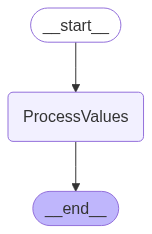

In [10]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({"values": [1, 2, 3, 5], "name": "Shubham", "operation": "*"})  # Run the app with an initial state
result

{'name': 'Shubham', 'values': [1, 2, 3, 5], 'operation': '*', 'result': 30}